In [1]:
import one_shot_svd
import pdb

In [2]:
pdb.set_trace()
# h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv", 
#                                          (800,1280), (640,1024))
# h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_large", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv", 
#                                           (800,1280), (640,1024))
h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
                                          (800,1280), (640,1024))
# one_shot_svd.generate_and_save("/home/dshteinbok/nV3_PSFs_flat", "/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv", 
#                                           (800,1280), (640,1024), "../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")
one_shot_svd.save_generated(h, weights, "../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")

--Return--
None
> /tmp/ipykernel_43909/4247203676.py(1)<cell line: 1>()
----> 1 pdb.set_trace()
      2 # h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv",
      3 #                                          (800,1280), (640,1024))
      4 # h, weights = one_shot_svd.generate_model("/home/dshteinbok/nV3_PSFs_large", "/home/dshteinbok/nV3_PSFs_meta/PSF_Shifts.csv",
      5 #                                           (800,1280), (640,1024))

ipdb> c
creating matrix

done

starting svd...

check values of ymat
interpolating...

done




In [3]:
weights.shape

(800, 1280, 28)

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# plt.imshow(np.sum(weights[0,0,:]*h, -1)[350:450,600:700])
# plt.imshow(np.sum(weights[0,0,:]*h, -1))

Read image in:            15078760
Resized image in:           224061089
image has 3 channels. Converting to grayscale.
Converted to grayscalse in:            12827416
Simulated in:                 662


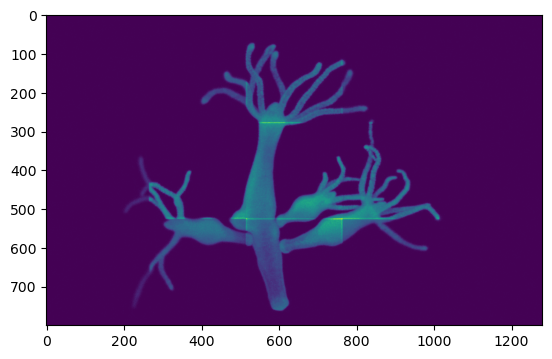

In [5]:
import sys
sys.path.append("../tensorflow")
import simulator

flatsim = simulator.ImageSimulator("../data/nV3_flat_h.mat", "../data/nV3_flat_weights.mat")
_, sim = flatsim.simulate("../data/hydra3.jpg", my_simulation=False)
plt.imshow(sim)

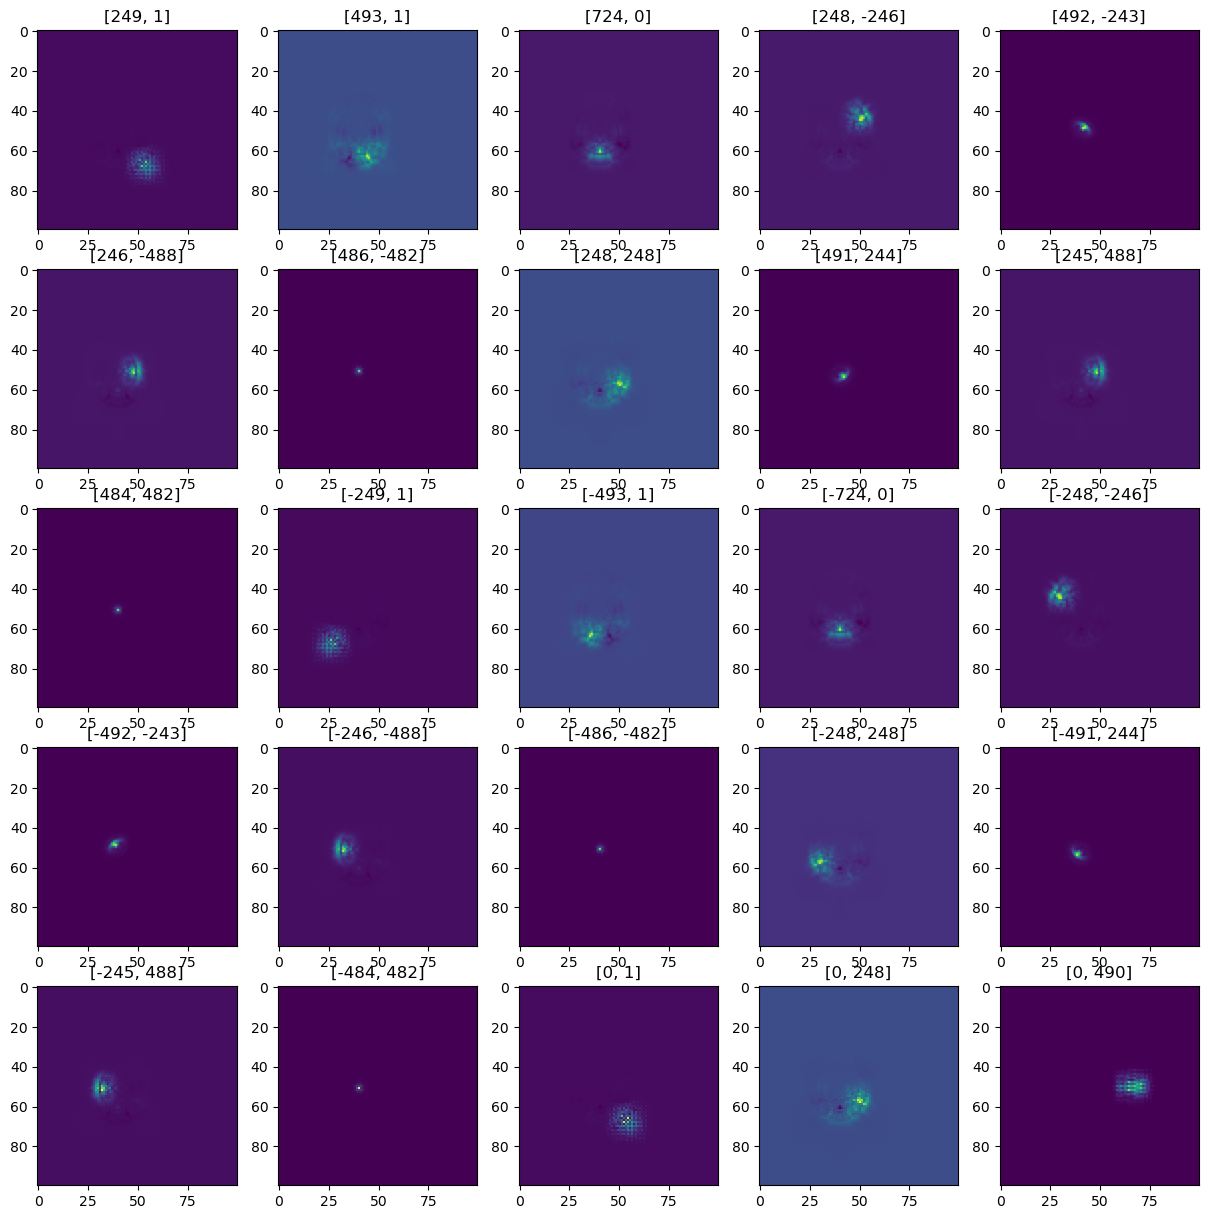

In [6]:
# examine each of the PSFs

# load the metaman for meaningful plot titles (the supposed locations)
import load_PSFs
metaman = load_PSFs.MetaMan("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")
fig, axs = plt.subplots(5,5, figsize=(15,15))
for row in range(5):
    for column in range(5):
        index = row*5 + column
        axs[row,column].imshow(np.sum(weights[metaman.shifts[index+1][1],metaman.shifts[index+1][0],:]*h, -1)[350:450,600:700])
        axs[row, column].set_title(metaman.shifts[index+1])

Read image in:            10279208
Resized image in:             8303295
Converted to grayscalse in:                3106
Simulated in:                 400


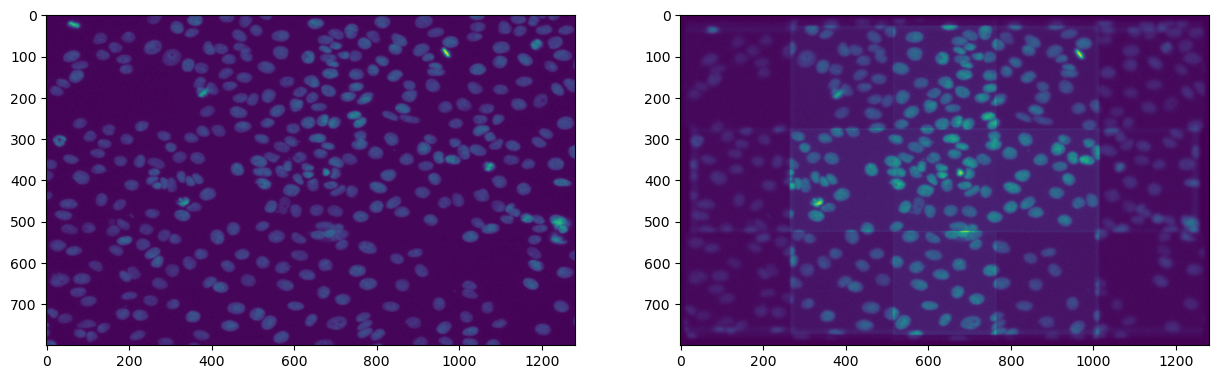

In [10]:
img, sim = flatsim.simulate('/home/dshteinbok/TrainingData/Ground_truth_downsampled/1.png', my_simulation=False)
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img)
axs[1].imshow(sim)